In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [8]:
import re
import string

Convert uppercase to lowercase


In [9]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Links


In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE)for x in x.split()))

In [14]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove puctuations

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [18]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove Numbers

In [19]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
data["tweet"] = data["tweet"].str.replace('\d+','',regex=True)

In [21]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [22]:
!pip install nltk

     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.9 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.9 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/41.9 kB 259.2 kB/s eta 0:00:01
     -------------------------------------  41.0/41.9 kB 245.8 kB/s eta 0:00:01
     -------------------------------------  41.0/41.9 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 41.9/41.9 kB 144.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 654.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 888.4 kB/s eta 0:00:02


In [23]:
import nltk

In [24]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [32]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Building Vocabulary

In [41]:
from collections import Counter
vocab = Counter()

In [42]:
vocab

Counter()

In [43]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [45]:
len(vocab)

15949

In [46]:
tokens = [key for key in vocab if vocab[key]>10]

In [48]:
len(tokens)

1145

In [49]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

### Divide dataset in to train and test

In [50]:
X = data["tweet"]
y = data["label"]

In [53]:
!pip install scikit-learn

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Vectorization

In [56]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)
    return vectorized_lst_new

In [59]:
vectorized_x_train = vectorizer(X_train,tokens)

In [60]:
vectorized_x_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
vectorized_x_test = vectorizer(X_test,tokens)

In [62]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_train.value_counts()

label
0    4693
1    1643
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

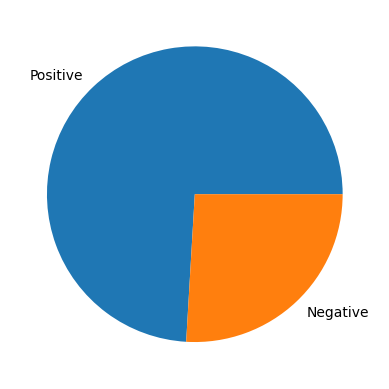

In [64]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive', 'Negative'])
plt.show

### Handle Imbalnced dataset

In [66]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.0 kB 273.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 350.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 400.9 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.0 kB 448.2 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/258.0 kB 535.8 kB/s eta 0:00:01
   -------------------------------------  256.0/258.0 kB 605.3 kB/s eta 0:00:01
   -------------------------------------  256.0/258.0 kB 605.3 kB/s eta 0:00:01
   -------------------------------------  256.0/258.0 kB 605.3 kB

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)


(9386, 1145) (9386,)


In [69]:
y_train_smote.value_counts()

label
0    4693
1    4693
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

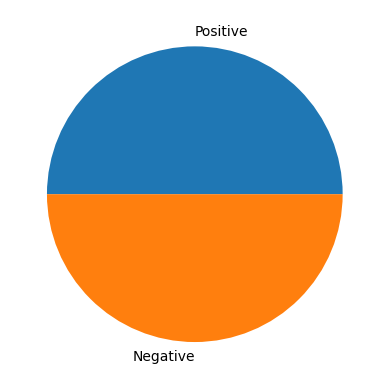

In [70]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive', 'Negative'])
plt.show

In [71]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9381    1
9382    1
9383    1
9384    1
9385    1
Name: label, Length: 9386, dtype: int64

In [74]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
y_test

4536    0
673     0
6210    1
7523    0
1598    0
       ..
4801    0
4729    0
4369    0
6968    0
2195    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [89]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test_pred,y_test)

Training Scores:
	Accuracy = 0.942
	Precision = 0.92
	Recall = 0.968
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.866
	Precision = 0.812
	Recall = 0.688
	F1-Score = 0.745


### Naive Bayes

In [90]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test_pred,y_test)

Training Scores:
	Accuracy = 0.911
	Precision = 0.872
	Recall = 0.962
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.872
	Precision = 0.906
	Recall = 0.676
	F1-Score = 0.775


### Decision Tree

In [91]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test_pred,y_test)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.825
	Precision = 0.601
	Recall = 0.65
	F1-Score = 0.624


### Random Forest

In [92]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test_pred,y_test)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.878
	Precision = 0.721
	Recall = 0.76
	F1-Score = 0.74


### SVM

In [93]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test_pred,y_test)

Training Scores:
	Accuracy = 0.978
	Precision = 0.96
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.876
	Precision = 0.783
	Recall = 0.726
	F1-Score = 0.754


In [94]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(svm,file)